In [ ]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import numpy as np

In [2]:
tickers = ['AMER3.SA', 'SMTO3.SA', 'PETR4.SA', 'VALE3.SA', 'VIVA3.SA', 'ABEV3.SA', 'NTCO3.SA']
start = "2022-08-18"
end = "2023-08-18"
df = yf.download(tickers, start = start, end = end)['Adj Close'].dropna()
df = df.pct_change()
df

[*********************100%%**********************]  7 of 7 completed


Ticker,ABEV3.SA,AMER3.SA,NTCO3.SA,PETR4.SA,SMTO3.SA,VALE3.SA,VIVA3.SA
Date,,,,,,,
2022-08-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-19,-0.021250,-0.044021,-0.039814,-0.050568,-0.017084,-0.011223,-0.032701
2022-08-22,-0.015326,0.224866,-0.031790,0.021431,-0.027869,-0.014635,-0.002087
2022-08-23,0.001297,0.159148,0.054247,0.031780,0.001541,0.064110,0.050607
2022-08-24,0.023316,-0.003784,0.083277,0.005981,-0.001231,-0.032189,0.007564
...,...,...,...,...,...,...,...
2023-08-11,-0.000696,0.000000,0.007403,-0.002285,0.004347,-0.008326,-0.010058
2023-08-14,-0.002089,0.009434,-0.030526,0.002618,-0.009521,-0.026600,-0.020649
2023-08-15,-0.009072,-0.009346,0.054811,0.007180,0.023012,-0.009855,0.003681


In [3]:
qtd_carteiras = 100000
riskfree = 0.1315
retorno = []
retorno_aux = []
volatilidade = []
volatilidade_aux = []
sharpe = []
sharpe_aux = []

In [4]:
for p in range(qtd_carteiras):
  pesos = np.random.random(len(tickers))
  pesos /= np.sum(pesos)
  retorno_aux = np.dot(pesos, df.mean()) * 252
  volatilidade_aux = np.sqrt(np.sum(pesos ** 2 * df.var() * 252))
  sharpe_aux = (retorno_aux - riskfree) / volatilidade_aux
  retorno.append(retorno_aux)
  volatilidade.append(volatilidade_aux)
  sharpe.append(sharpe_aux)

carteira = pd.DataFrame({'Retorno': retorno, 'Risco': volatilidade, 'Sharpe': sharpe})

<Axes: xlabel='Risco', ylabel='Retorno'>

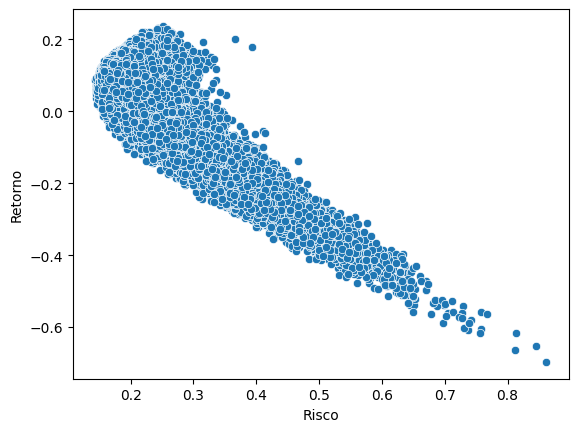

In [6]:
sns.scatterplot(x = 'Risco', y = 'Retorno', data = carteira)